# Image Processing SS 16 - Assignment - 02

### Deadline is 4.5.2016 at 16:00 o'clock

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.


# Exercise 1 - 10 Points

Implement affine transformation with [bicubic interpolation](https://en.wikipedia.org/wiki/Bicubic_interpolation).

In [1]:
# display the plots inside the notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

The [skimage](http://scikit-image.org/) library comes with multiple useful test images.  Let's start with an image of an astronaut. 

In [3]:
from skimage.data import astronaut
from skimage.color import rgb2gray

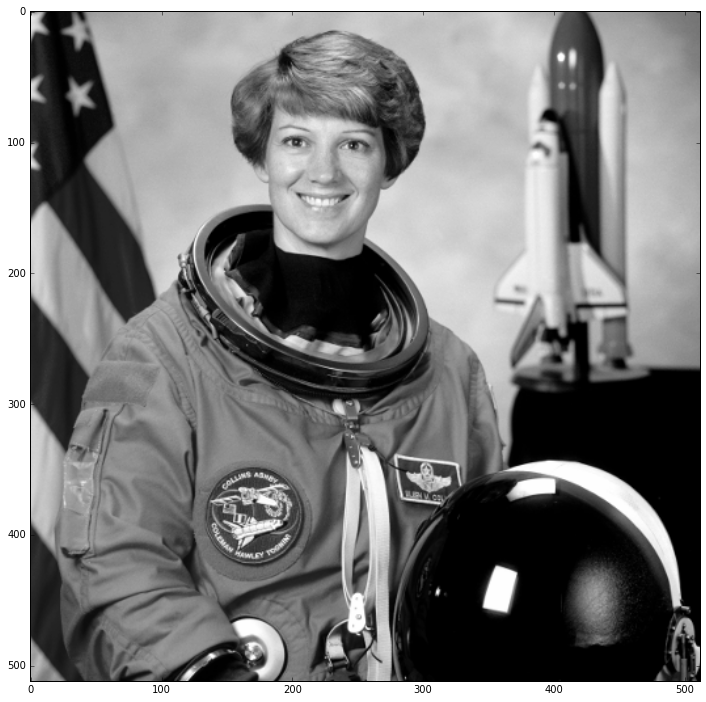

In [4]:
# We use a gray image. All the algorithms should work with color images too.
img = rgb2gray(astronaut() / 255.)
plt.imshow(img, cmap='gray')
plt.show()

In [5]:
def derive_y(image):
    """Computes the derivative of the image w.r.t the y coordinate"""
    derived_image = np.zeros_like(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if y + 1 < image.shape[1] and y - 1 > 0:
                derived_image[x,y] = image[x, y - 1] - image[x, y + 1]
    return derived_image

def derive_x(image):
    """Computes the derivative of the image w.r.t the x coordinate"""
    derived_image = np.zeros_like(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if x + 1 < image.shape[1] and x - 1 > 0:
                derived_image[x,y] = image[x - 1, y] - image[x + 1, y]
    return derived_image

In [6]:
dx_img = derive_x(img)
dy_img = derive_y(img)

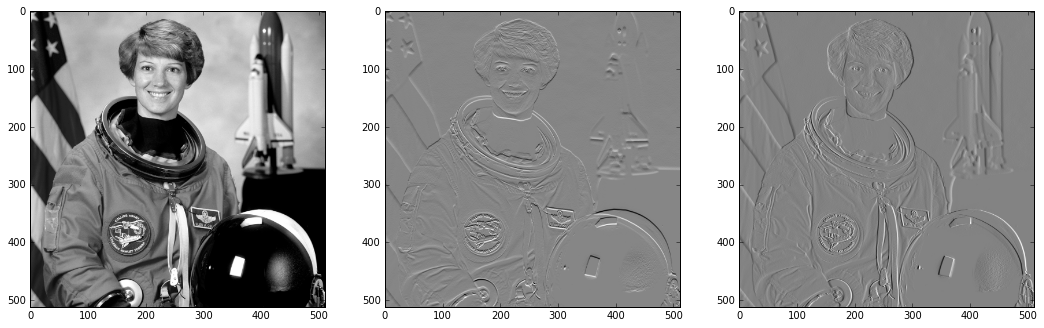

In [7]:
plt.figure(figsize=(18, 12))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.subplot(132)
plt.imshow(dx_img, cmap='gray')
plt.subplot(133)
plt.imshow(dy_img, cmap='gray')
plt.show()

In [8]:
# The derivatives are no longer in the range [0,1].
print("min: {}, max: {}".format(dx_img.min(), dx_img.max()))

min: -0.9896796078431372, max: 0.8965913725490197


In [9]:
indicies = np.indices(img.shape).reshape(2, -1)
indicies.shape

(2, 262144)

In [10]:
# pick some random index

In [11]:
indicies[:, 123456]

array([241,  64])

In [12]:
indicies_hg = np.concatenate([
        indicies, np.ones((1, indicies.shape[1]))], axis=0)
indicies_hg.shape

(3, 262144)

In [13]:
indicies_hg[:, 123456]

array([ 241.,   64.,    1.])

In [14]:
T_scale = np.array([
    [0.75, 0, 0],
    [0, 0.75, 0],
    [0, 0, 1],
])
# np.dot(T_affine, indicies_hg).shape, for python < 3.5
(T_scale @ indicies_hg).shape

(3, 262144)

In [15]:
T_affine = np.array([
    [0.75, 0.2, 100],
    [-0.2, 0.75, 100],
    [0, 0.001, 1],
])

In [16]:
# you can use this function to invert the matricies
np.linalg.inv(T_scale)

array([[ 1.33333333,  0.        ,  0.        ],
       [ 0.        ,  1.33333333,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [17]:
def affine_transformation(img, matrix):
    # your code here
    pass

In [18]:
def bicubic_interpolation(img, indicies):
    dx_img = derive_x(img)
    dy_img = derive_y(img)
    dxy_img = derive_x(dy_img)
    # your code here

In [19]:
img_scale = affine_transformation(img, T_scale)
img_affine = affine_transformation(img, T_affine)

TypeError: Image data can not convert to float

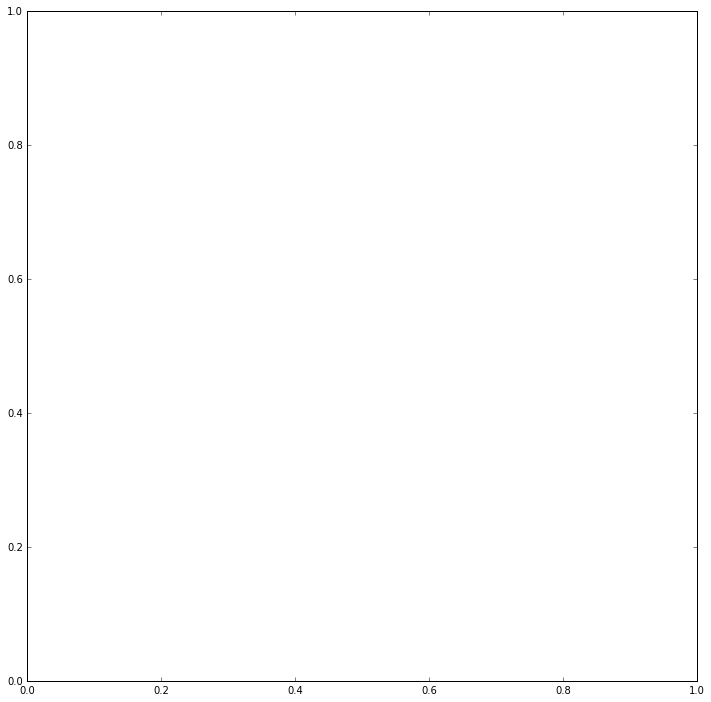

In [20]:
plt.imshow(img_scale, cmap='gray')
plt.show()

In [ ]:
plt.imshow(img_affine, cmap='gray')
plt.show()